In [2]:
%matplotlib inline
import matplotlib
#matplotlib.use('Agg')

In [3]:
import numpy as np
import pandas as pd
import os  
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import io
import dateutil
import collections
import time
from datetime import datetime
import wrds
import networkx as nx

In [4]:
db = wrds.Connection()

Loading library list...
Done


In [5]:
list_libraries = db.list_libraries()
list_libraries[:10]

['aha_sample',
 'ahasamp',
 'audit',
 'audit_audit_comp',
 'audit_corp_legal',
 'block',
 'boardex',
 'boardex_na',
 'boardex_trial',
 'calcbench_trial']

In [9]:
nodelist = pd.read_excel('Supply_Chain_No_Dup.xlsx', 'WRDS') #make a pandas df from Nodes.csv
supplierinfo = pd.read_excel('Supplier_Names.xlsx') #Supplier Names with gvkey
customerinfo = pd.read_excel('Customer_Name.xlsx') #Supplier Names with gvkey

In [10]:
print(list(nodelist))
#edge_list[:10]

['SupplierGvkey', 'SupplierName', 'CustomerGvkey', 'CustomerCurrentName', 'Date', 'Sales']


In [11]:
#Create Graph and Edges from dataframe
G=nx.from_pandas_dataframe(nodelist,'CustomerGvkey','SupplierGvkey',edge_attr=True)
#from_pandas_dataframe(df,source,target,edge_attr=True (true pulls all other columns))

In [12]:
for i, nlrow in supplierinfo.iterrows():
    G.node[nlrow['SupplierGvkey']] = nlrow[1:].to_dict() #Add info to Supplier Gvkey Nodes

In [13]:
for i, nlrow in customerinfo.iterrows():
    G.node[nlrow['CustomerGvkey']] = nlrow[1:].to_dict() #Add info to Customer Gvkey Nodes

In [14]:
nx.number_of_nodes(G)

11735

In [26]:
degrees = G.degree()  # the number of degrees for each node
type(degrees)

dict

In [29]:
import pandas as pd

In [41]:
degdf = pd.DataFrame()
degdf["nodeid"] = degrees.keys()
degdf["degree"] =  degrees.values()
print(degdf.shape)
degdf.head()

(11735, 2)


,nodeid,degree
0,65548,1
1,65550,1
2,65552,2
3,65553,2
4,65554,3


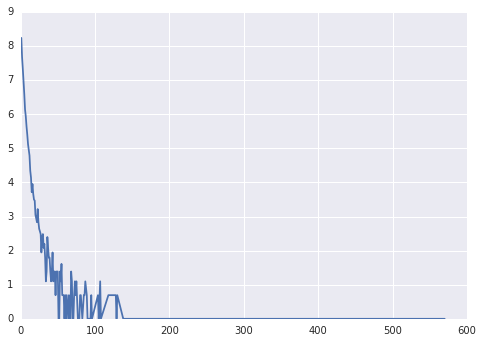

In [47]:
import numpy as np
deg_freq = degdf.groupby('degree').count()
plt.plot(deg_freq.index, np.log(deg_freq['nodeid']))

In [35]:
degrees[65548]

1

In [16]:
G.nodes(data=True)[0:10] #First 10 nodes

[(65548, {'CurrentCompanyName': 'CAMDEN NATIONAL CORP'}),
 (65550, {'CompanyName': 'LOGILITY INC'}),
 (65552, {'CompanyName': 'IDENTIV INC'}),
 (65553, {'CompanyName': 'TRIMERIS INC'}),
 (65554, {'CompanyName': 'POWER-ONE INC'}),
 (185689, {'CurrentCompanyName': 'PERSHING GOLD CORP'}),
 (65570, {'CompanyName': 'AMER ITALIAN PASTA CO  -CL A'}),
 (65572, {'CompanyName': 'DECOR GROUP INC'}),
 (163877, {'CompanyName': 'PIKE CORP'}),
 (65574, {'CompanyName': 'STARTEC GLOBAL COMMUNICTNS'})]

In [17]:
G.edges(data=True)[0:10] #First 10 edges

[(65548,
  19877,
  {'CustomerCurrentName': 'CAMDEN NATIONAL CORP',
   'CustomerGvkey': 65548,
   'Date': '12/31/2013',
   'Sales': 0.0,
   'SupplierGvkey': 19877,
   'SupplierName': 'Q2 HOLDINGS INC'}),
 (65550,
  3362,
  {'CustomerCurrentName': 'CONAGRA BRANDS INC',
   'CustomerGvkey': 3362,
   'Date': '04/30/2000',
   'Sales': 4.198,
   'SupplierGvkey': 65550,
   'SupplierName': 'LOGILITY INC'}),
 (65552,
  6066,
  {'CustomerCurrentName': 'INTL BUSINESS MACHINES CORP',
   'CustomerGvkey': 6066,
   'Date': '12/31/1996',
   'Sales': 2.582,
   'SupplierGvkey': 65552,
   'SupplierName': 'IDENTIV INC'}),
 (65552,
  30170,
  {'CustomerCurrentName': 'FLEX LTD',
   'CustomerGvkey': 30170,
   'Date': '12/31/2008',
   'Sales': 2.836,
   'SupplierGvkey': 65552,
   'SupplierName': 'IDENTIV INC'}),
 (65553,
  25648,
  {'CustomerCurrentName': 'ROCHE HOLDING AG',
   'CustomerGvkey': 25648,
   'Date': '12/31/2001',
   'Sales': 1.304,
   'SupplierGvkey': 65553,
   'SupplierName': 'TRIMERIS INC'}),
 

In [18]:
list(nx.connected_components(G)) #Connected nodes

[{17195, 17451, 19877, 61693, 65548, 117141, 148669},
 {65550,
  65552,
  65553,
  65554,
  65570,
  65572,
  163877,
  65574,
  163879,
  65578,
  163884,
  65580,
  163887,
  163888,
  65585,
  65586,
  32819,
  65587,
  163893,
  65590,
  65593,
  65604,
  65609,
  163916,
  65615,
  163921,
  163922,
  163923,
  163927,
  163929,
  163933,
  163935,
  163939,
  65637,
  65640,
  163946,
  65643,
  163948,
  65652,
  65658,
  163963,
  65662,
  65665,
  65671,
  163975,
  163977,
  65675,
  65676,
  163983,
  65679,
  65681,
  163984,
  65686,
  65690,
  65697,
  65703,
  65705,
  65706,
  65708,
  65710,
  65716,
  65718,
  65725,
  65731,
  65735,
  65739,
  164046,
  65749,
  65753,
  65757,
  65764,
  65765,
  65766,
  65768,
  164075,
  65772,
  65773,
  65771,
  164086,
  65783,
  65788,
  164099,
  65795,
  164109,
  65805,
  65819,
  65825,
  65827,
  164132,
  65829,
  33067,
  65850,
  65853,
  65872,
  65875,
  65880,
  65881,
  65882,
  164190,
  131423,
  65887,
  65893

In [19]:
degrees = nx.degree_centrality(G) #Degrees of nodes

In [ ]:
closeness = nx.closeness_centrality(G) #Closeness of nodes

In [ ]:
betweeness = nx.betweenness_centrality(G) #Betweenness for nodes

In [ ]:
clustering = nx.clustering(G) #Clustering of nodes

In [ ]:
clustering

In [ ]:
nx.draw(G)